### pandas
- 데이터 분석에 많이 사용되는 라이브러리
- Series, DataFrame 두 자료구조를 제공


### Series
- 1차원 형태의 배열
- 인덱스(index) + 값(value)

In [1]:
# 판다스 라이브러리 불러오기.
import pandas as pd

In [2]:
# Series 생성
print(pd.Series([1, 2, 3, 4]))

0    1
1    2
2    3
3    4
dtype: int64


In [3]:
print(pd.Series([9904312, 3448737, 2890451, 2466052]))
# 도시 별 인구 수 데이터

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64


In [4]:
# 어떤 도시인지 인덱스로 표기
population = pd.Series([9904312, 3448737, 2890451, 2466052], index = ['서울', '부산', '인천', '대구'])

### Series 안에 있는 자료들 확인
1. 값(value)
2. 인덱스(index)
3. 데이터 타입(dtype) : 시리즈도 안에 동일한 자료형만을 넣을 수 있음

In [5]:
print(population.values)
print(population.index)
# pandas서 제공하는 index 위한 자료구조(배열이랑 유사)
print(population.dtype)

[9904312 3448737 2890451 2466052]
Index(['서울', '부산', '인천', '대구'], dtype='object')
int64


### Series 이름 지정
- 시리즈 자체 이름
- 시리즈의 인덱스 이름

In [6]:
# 1. 시리즈의 이름
# 시리즈의 이름 속성(attribute)에 접근해서 값을 넣어줌
population.name = '도시별 인구'
print(population)

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 도시별 인구, dtype: int64


In [7]:
# 2. 시리즈의 인덱스 이름 설정
# 시리즈 인덱스 속성 접근 → 이름 속성 접근해서 값을 넣어줌
population.index.name = '도시'
print(population)

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 도시별 인구, dtype: int64


### 시리즈 연산

In [8]:
# 배열이랑 똑같음.
# 배열 - 배열 연산 : 같은 위치에 있는 요소들끼리 연산한 결과를 배열로 묶어서 전달
# 연산에 사용할 시리즈 2개 생성
# s1 시리즈 : [1, 2, 3, 4]
s1 = pd.Series([1, 2, 3, 4])

# s2 시리즈 : [3, 4, 5, 6]
s2 = pd.Series([3, 4, 5, 6])
print(s1)
print(s2)

0    1
1    2
2    3
3    4
dtype: int64
0    3
1    4
2    5
3    6
dtype: int64


In [9]:
# s1과 s2연산
print(s2 - s1)
# 시리즈도 같은 위치에 있는 요소들끼리 연산한 결과를 시리즈로 묶어서 전달

0    2
1    2
2    2
3    2
dtype: int64


In [10]:
# 스칼라 값(숫자 하나)과 연산
print(s2 * 2)
# 각 요소 별로 연산한 결과를 시리즈로 묶어서 전달

0     6
1     8
2    10
3    12
dtype: int64


### 시리즈의 인덱싱과 슬라이싱
- 인덱스 번호 존재 → 인덱싱과 슬라이싱 가능
- boolean index도 가능

In [11]:
# 서울의 인구 가져오기
print(population[0])
print(population['서울'])

9904312
9904312


C:\Users\notye\AppData\Local\Temp\ipykernel_34224\1229394050.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(population[0])


In [12]:
# 한번에 여러 값 인덱싱하기
# 인덱싱하고 싶은 값들의 인덱스를 리스트로 묶어서 전달
print(population[['서울', '인천', '대구']])

도시
서울    9904312
인천    2890451
대구    2466052
Name: 도시별 인구, dtype: int64


In [13]:
# 슬라이싱에도 인덱스번호, 사용자가 지정한 인덱스 둘 다 사용 가능
# 시리즈이름[시작:끝+1]
# 시리즈이름[시작:끝]

# 서울~인천
print(population[0:3])
print(population['서울':'인천'])

도시
서울    9904312
부산    3448737
인천    2890451
Name: 도시별 인구, dtype: int64
도시
서울    9904312
부산    3448737
인천    2890451
Name: 도시별 인구, dtype: int64


In [19]:
# 불리언 인덱싱 : 원하는 데이터를 필터링하는 방법
# population 중에서 인구가 300만 이상인 도시만 확인.

# 시리즈 + 비교연산자(부등호) : 각 요소별로 비교를 해서 결과(True/False)를 시리즈로 묶어서 반환
print(population >= 3000000)
# 이 조건을 활용해서 불리언 인덱싱 가능
print(population[population >= 3000000])

도시
서울     True
부산     True
인천    False
대구    False
Name: 도시별 인구, dtype: bool
도시
서울    9904312
부산    3448737
Name: 도시별 인구, dtype: int64


In [27]:
# 1. 도시 인구가 250만 초과인 도시 필터링
print(population[population > 2500000])

# 2. 도시 인구가 300만 미만이고 250만 이상인 도시 필터링
# 논리 연산자 (and, or, not) : 두 조건을 동시에 만족하는 걸 찾아야 되기 때문에 and로 연결.
# population < 3000000 and population >= 2500000

# 논리 연산자(and, or) 한 개의 조건(Boolean) 값을 연결하는 것 밖에 못함
# 조건 - 조건, boolean - boolean
# 시리즈 - 시리즈 연결은 and 연산자가 할 수 없는 일
# & (비트연산자를 오버로딩)
#population < 3000000 & population >= 2500000

# 2번째 발생한 에러
# 연산자의 우선 순위
# 사용자가 직접 연산자의 우선순위를 알려줘야함. -> 소괄호로 묶기.
print(population[(population < 3000000) & (population >= 2500000)])

도시
서울    9904312
부산    3448737
인천    2890451
Name: 도시별 인구, dtype: int64
도시
인천    2890451
Name: 도시별 인구, dtype: int64


In [28]:
# 딕셔너리
# {key : value, } 쌍을 이루는 자료형
dict1 = {'서울':9631482,
        '부산':3393191,
        '인천':2632035,
        '대전':1490158}

In [30]:
print(pd.Series(dict1))
# 딕셔너리를 기반으로 시리즈를 생성하면
# 딕셔너리의 key값이 index로, value 값이 value로 설정

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64


In [33]:
food_name = ['치킨', '닭갈비', '삼겹살', '공기밥', '닭가슴살', '아보카도', '우유']
food_kcal = [840, 585, 661, 310, 120, 320, 122]

# food_data라는 시리즈 생성
# index는 food_name
# value는 food_kcal

# 시리즈 자체의 이름 : 음식 별 칼로리
# 시리즈의 인덱스 이름 : 음식
food_data = pd.Series(food_kcal, index = food_name)
food_data.name = "음식 별 칼로리"
food_data.index.name = "음식"
print(food_data)

음식
치킨      840
닭갈비     585
삼겹살     661
공기밥     310
닭가슴살    120
아보카도    320
우유      122
Name: 음식 별 칼로리, dtype: int64


In [35]:
# 1. 삼겹살 칼로리
print(food_data['삼겹살'])

# 2. 삼겹살, 공기밥, 치킨 칼로리
print(food_data[['삼겹살', '공기밥', '치킨']])

# 3. 공기밥~우유
print(food_data['공기밥':'우유'])

# 4. 닭갈비~ 아보카도
print(food_data['닭갈비':'아보카도'])

# 5. 아보카도~치킨(역방향 -> 증감량 조절)
print(food_data['아보카도':'치킨':-1])

# 6. 칼로리가 500 초과인 음식
print(food_data[food_data > 500])

# 7. 칼로리가 150 미만인 음식
print(food_data[food_data < 150])

# 8. 칼로리가 150 이상 500 이하인 음식
print(food_data[(food_data <= 500) & (food_data >= 150)])

661
음식
삼겹살    661
공기밥    310
치킨     840
Name: 음식 별 칼로리, dtype: int64
음식
공기밥     310
닭가슴살    120
아보카도    320
우유      122
Name: 음식 별 칼로리, dtype: int64
음식
닭갈비     585
삼겹살     661
공기밥     310
닭가슴살    120
아보카도    320
Name: 음식 별 칼로리, dtype: int64
음식
아보카도    320
닭가슴살    120
공기밥     310
삼겹살     661
닭갈비     585
치킨      840
Name: 음식 별 칼로리, dtype: int64
음식
치킨     840
닭갈비    585
삼겹살    661
Name: 음식 별 칼로리, dtype: int64
음식
닭가슴살    120
우유      122
Name: 음식 별 칼로리, dtype: int64
음식
공기밥     310
아보카도    320
Name: 음식 별 칼로리, dtype: int64


In [36]:
# 새로운 데이터 추가
# 시리즈이름['새로운 인덱스'] = 값
food_data['계란말이'] = '500칼로리'
print(food_data)
# 시리즈에는 동일한 자료형들만 조재할 수 있기 때문에
# object로 형 변환을 해서 모든 데이터를 포함할 수 있도록 함

음식
치킨         840
닭갈비        585
삼겹살        661
공기밥        310
닭가슴살       120
아보카도       320
우유         122
계란말이    500칼로리
Name: 음식 별 칼로리, dtype: object


In [38]:
# 값 수정
# 닭갈비에 소금을 너무 많이 넣었음 그랬더니 칼로리가 올랐어.
# 시리즈이름[인덱스] = 새로운 값
food_data['닭갈비'] = 590
print(food_data)

음식
치킨         840
닭갈비        590
삼겹살        661
공기밥        310
닭가슴살       120
아보카도       320
우유         122
계란말이    500칼로리
Name: 음식 별 칼로리, dtype: object


In [39]:
# 계란말이 삭제
# 1. del 키워드 사용
# del 인덱싱으로 삭제 요소 접근
del food_data['계란말이']
print(food_data)

# 삭제하는 작업은 한 번만. 하기
# 계란말이를 삭제하면 이제 계란말이는 food_data에 존재하지 않음
# 존재하지 않는데 계란말이 삭제?

음식
치킨      840
닭갈비     590
삼겹살     661
공기밥     310
닭가슴살    120
아보카도    320
우유      122
Name: 음식 별 칼로리, dtype: object


In [40]:
# 우유 삭제
# drop 함수
# (삭제할데이터가있는)시리즈이름.drop(인덱스)
print(food_data.drop('우유'))
# 원본 데이터 변경 안 함
# 삭제하면 시리즈가 이렇게 나와. 보여만줌
# 원본 데이터에 반영하려면
# 1. inplace 속성 True로 주기.
# print(food_data.drop('우유', inplace = True))
# 2. 변경된 데이터로 덮어 씌워주기
# food_data = food_data.drop('우유')

음식
치킨      840
닭갈비     590
삼겹살     661
공기밥     310
닭가슴살    120
아보카도    320
Name: 음식 별 칼로리, dtype: object

In [41]:
# 모든 음식의 칼로리가 -300감소
print(food_data - 300)

음식
치킨       540
닭갈비      290
삼겹살      361
공기밥       10
닭가슴살    -180
아보카도      20
우유      -178
Name: 음식 별 칼로리, dtype: object


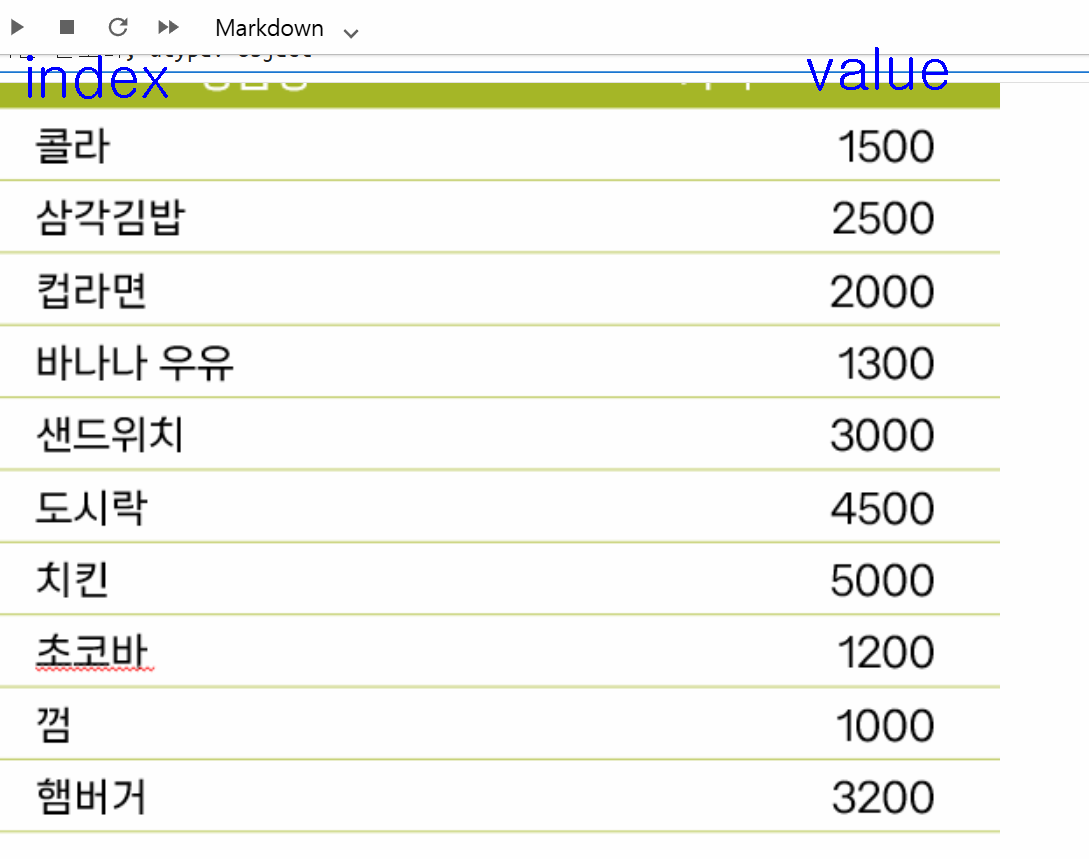

In [51]:
# 상품 이름(index)과 상품 가격(value)이 들어있는 시리즈 products
# 시리즈 이름 : 상품별 가격
# 시리즈의 인덱스 이름 : 상품명
products = pd.Series([1500, 2500, 2000, 1300, 3000, 4500, 5000, 1200, 1000, 3200],
                     index = ['콜라', '삼각깁밥', '컵라면', '바나나 우유', '샌드위치', '도시락', '치킨', '초코바', '껌', '햄버거'])
products.name = "상품별 가격"
products.index.name = "상품명"
print(products, "\n")

# 전품목 10% 세일
# sale_product에 세일가를 저장(시리즈 연산)
sale_produc = products * 0.9
print(sale_produc, "\n")

# ------세일가 기준-------
# 1. 컵라면, 삼각깁밥, 콜라 모든 가격 더해서 출력
print(sale_produc['컵라면'] + sale_produc['삼각깁밥'] + sale_produc['콜라'], "\n")

# 2. 초코바 가격 출력
print(sale_produc['초코바'], "\n")

# 3. 세일가 3000원 이하인 상품들만 출력
print(sale_produc[sale_produc >= 3000], "\n")

# 4. 껌은 10%가 아니라 15% 세일가로 수정
sale_produc['껌'] = sale_produc['껌'] / 0.9 * 0.85
print(sale_produc, "\n")

# 5. 치킨, 샌드위치는 할인에서 제외, sale_product에서 삭제
del sale_produc['치킨']
del sale_produc['샌드위치']
print(sale_produc)

상품명
콜라        1500
삼각깁밥      2500
컵라면       2000
바나나 우유    1300
샌드위치      3000
도시락       4500
치킨        5000
초코바       1200
껌         1000
햄버거       3200
Name: 상품별 가격, dtype: int64 

상품명
콜라        1350.0
삼각깁밥      2250.0
컵라면       1800.0
바나나 우유    1170.0
샌드위치      2700.0
도시락       4050.0
치킨        4500.0
초코바       1080.0
껌          900.0
햄버거       2880.0
Name: 상품별 가격, dtype: float64 

5400.0 

1080.0 

상품명
도시락    4050.0
치킨     4500.0
Name: 상품별 가격, dtype: float64 

상품명
콜라        1350.0
삼각깁밥      2250.0
컵라면       1800.0
바나나 우유    1170.0
샌드위치      2700.0
도시락       4050.0
치킨        4500.0
초코바       1080.0
껌          850.0
햄버거       2880.0
Name: 상품별 가격, dtype: float64 

상품명
콜라        1350.0
삼각깁밥      2250.0
컵라면       1800.0
바나나 우유    1170.0
도시락       4050.0
초코바       1080.0
껌          850.0
햄버거       2880.0
Name: 상품별 가격, dtype: float64
